In [1]:
using Plots

**Universidade Federal de Alagoas**<br>
**Instituto de Computação**<br>
**Engenharia de Computação**<br>
**Disciplina**: Modelagem do Sistema Cardiovascular Humano<br>
**Professor**: Thiago D. Cordeiro<br>
**Alunos**: Hugo Tallys Martins Oliveira e Valério Nogueira Rodrigues Júnior<br>

# Implementação da função Elastância

Implemente a função elastância descrita por Lim *et al*. [1] e compare a curva desta
função com aquela descrita por Simaan *et al*. [2]. Sabendo que o parâmetro elastância
máxima é utilizado para representar a condição de contratilidade do ventrículo, e que
quanto maior o seu valor maior a força de contratilidade do mesmo, utilize dois valores
para este parâmetro de modo a representar duas condições para o ventrículo.

In [53]:
t = 0:0.0001:2T

0.0:0.0001:2.0

## Lim *et al*.
$$
e_v(t) = sin(\pi(t - t_{sh}))^2
$$

In [54]:
T = 1.0
T_sys0 = 0.54
k_sys = 0.1
k_r = 0.83
T_sys = T_sys0 - (k_sys / T)
t_sh = 0
T_r = k_r * T_sys 

function eᵥ(t, T_sys0 = 0.54, k_r = 0.83)
    t %= T
    if ((t_sh + T_sys) <= t < T) || (0.0 <= t < t_sh)    
        return 0.0
    elseif t_sh <= t < (t_sh + T_r)
 
        num = π * (t - t_sh)
        den = 2T_r
        return sin(num / den)^2
    elseif (t_sh + T_r) <=  t < (t_sh + T_sys)
        num = π * (t - t_sh - T_r)
        den = 2.0 * (T_sys - T_r)
        return cos(num / den)^2
    end
end;

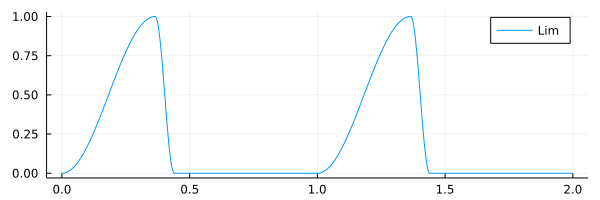

In [56]:
lim = map(eᵥ, t)
plot(t, lim, label="Lim", size = (600, 200))

## Simaan *et al*.
$$
E_n(t)
$$

In [29]:
Eₘₐₓ = 2.0
Eₘᵢₙ = 0.06
HR = 60
tc = 60 / HR
Tₘₐₓ = 0.2 + 0.15tc

function Eₙ(tₙ)
    n₁ = (tₙ / 0.7) ^ 1.9
    n₂ = (tₙ / 1.17) ^ 21.9
    return 1.55 * (n₁ / (1 + n₁)) * (1 / (1 + n₂))
end;

function E(t) 
    return (Eₘₐₓ - Eₘᵢₙ) * Eₙ(t/Tₘₐₓ) + Eₘᵢₙ
end;

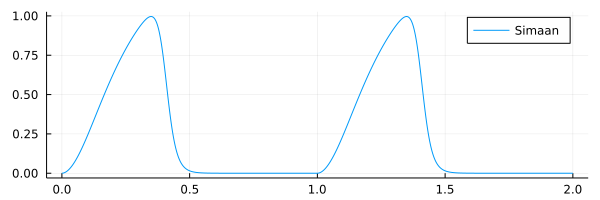

In [57]:
simaan = map(Eₙ, t .% T ./ Tₘₐₓ)
plot(t, simaan, label="Simaan", size = (600, 200))

## Comparando os dois modelos

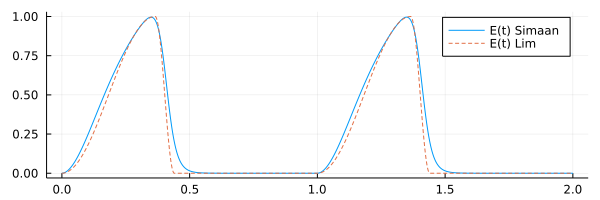

In [62]:
plot(t, simaan, label = "E(t) Simaan")
plot!(t, lim, line = :dash, label = "E(t) Lim", size = (600, 200))

# Referências

[1] Lim E, Dokos S, Cloherty SL, Salamonsen RF, Mason DG, Reizes JA, Lovell NH.**Parameter-optimized model of cardiovascular–rotary blood pump interactions**. IEEE Transactions on Biomedical Engineering. 2009 Sep 18;57(2):254-66.

[2] Simaan MA, Ferreira A, Chen S, Antaki JF, Galati DG. **A dynamical state space representation and performance analysis of a feedback-controlled rotary left ventricular assist device**. IEEE Transactions on Control Systems Technology. 2008 Dec 22;17(1):15-28.